## Predicting On-Base Percentage (OBP) for the 2021 MLB Season

This project focuses on predicting each player's on-base percentage (OBP) for the 2021 MLB season using their historical performance data, including plate appearances and OBP from prior seasons. The objective was to explore patterns in player performance, develop predictive models, and analyze factors influencing a player's ability to get on base.

By leveraging statistical modeling and Python-based analysis, the project aims to:

Understand the relationship between past OBP trends and future performance.

Identify key predictors that contribute to consistent or improving OBP.

Provide insights into player evaluation and team-building strategies.

I will solve this problem by using past performance data (OBP, PA, and age) for players from previous seasons, followed by training a linear regression model to predict the player's OBP for 2021. The model will be trained on the majority of the data and then used to predict the OBP for 2021 based on the player's historical data, with different weights assigned to each feature for accurate predictions.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('obp.csv')


# Convert birth_date to datetime and calculate player's age for each season because age is a factor in predicted obp
df['birth_date'] = pd.to_datetime(df['birth_date']) # Converts the birth_date column to a pandas datetime object so that I can work with date related operations
# This section of code calculates the player's age for each season from 2016 to 2021 based on their date of birth. The calculated ages are then stored in new columns in the DataFrame.
df['age_21'] = 2021 - df['birth_date'].dt.year
df['age_20'] = 2020 - df['birth_date'].dt.year
df['age_19'] = 2019 - df['birth_date'].dt.year
df['age_18'] = 2018 - df['birth_date'].dt.year
df['age_17'] = 2017 - df['birth_date'].dt.year
df['age_16'] = 2016 - df['birth_date'].dt.year

# This function calculates the mean of the player's available OBP values across previous seasons. It fills in missing OBP values by averaging the available ones.
def impute_obp(row):
    obp_columns = ['OBP_20', 'OBP_19', 'OBP_18', 'OBP_17', 'OBP_16']
    obp_values = [row[col] for col in obp_columns if pd.notnull(row[col])] 
    
    if obp_values: # This checks if the list obp_values is not empty (the player has at least one non-missing OBP value).
        return sum(obp_values) / len(obp_values)
    return None

# Apply imputation for missing OBP values 
df['OBP_20'].fillna(df.apply(impute_obp, axis=1))
df['OBP_19'].fillna(df.apply(impute_obp, axis=1))
df['OBP_18'].fillna(df.apply(impute_obp, axis=1))
df['OBP_17'].fillna(df.apply(impute_obp, axis=1))
df['OBP_16'].fillna(df.apply(impute_obp, axis=1))

# Drop rows with missing PA values 
df_final_cleaned = df.dropna(subset=['PA_20', 'PA_19','PA_18', 'PA_17', 'PA_16'])


# Select the relevant features for training (OBP, PA, and age from recent seasons). It is important to value recent seasons here.
features = ['PA_20', 'OBP_20', 'PA_19', 'OBP_19', 'PA_18', 'OBP_18', 'age_21']

target = 'OBP_21' 

X_final = df_final_cleaned[features] 
y_final = df_final_cleaned[target] 

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42) #This splits the data into training and testing sets using the train_test_split() function from the sklearn.model_selection library. It takes in the input values and target value

model_final = LinearRegression() 
model_final.fit(X_train_final, y_train_final) 

df_final_cleaned.loc[:, 'predicted_OBP_21'] = model_final.predict(X_final)

results = df_final_cleaned[['Name', 'predicted_OBP_21']]

print(results)



                  Name  predicted_OBP_21
1           Mike Trout          0.398264
2         Bryce Harper          0.381502
3         Chris Owings          0.271899
7         Byron Buxton          0.282874
9         Brandon Belt          0.346644
..                 ...               ...
560       Todd Frazier          0.299359
561     Scott Schebler          0.214595
565  Albert Almora Jr.          0.307458
568     Cameron Maybin          0.321081
571        Drew Butera          0.210429

[219 rows x 2 columns]


/var/folders/yz/btx95hws3k38_tyb73lg65_r0000gn/T/ipykernel_43179/1506229415.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned.loc[:, 'predicted_OBP_21'] = model_final.predict(X_final)


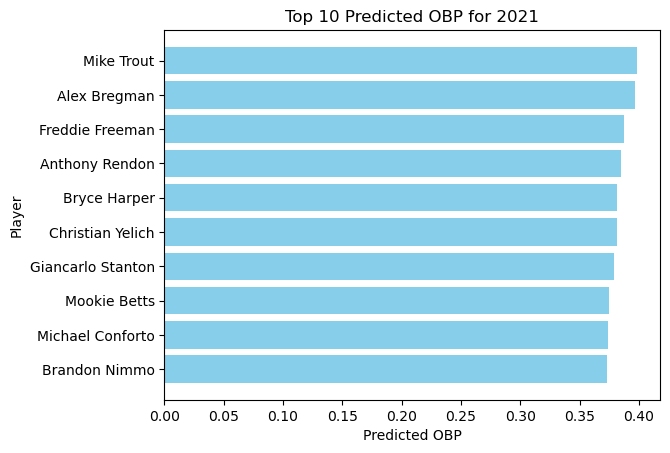

In [15]:

top_players = df_final_cleaned[['Name', 'predicted_OBP_21']].sort_values(by='predicted_OBP_21', ascending=False).head(10)
plt.barh(top_players['Name'], top_players['predicted_OBP_21'], color='skyblue')
plt.xlabel('Predicted OBP')
plt.ylabel('Player')
plt.title('Top 10 Predicted OBP for 2021')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



Mean Squared Error: 0.0026724501547512776
R² Score: 0.002268674189803588


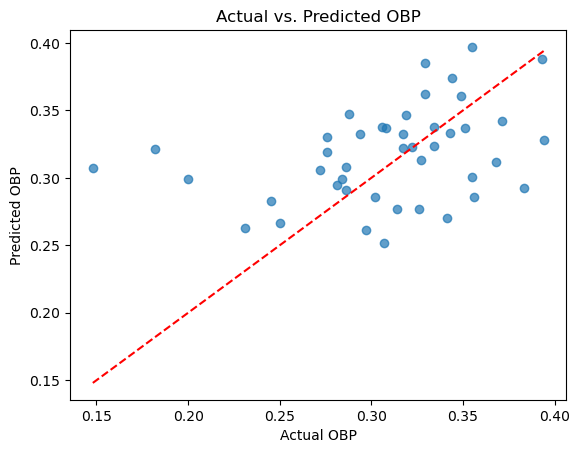

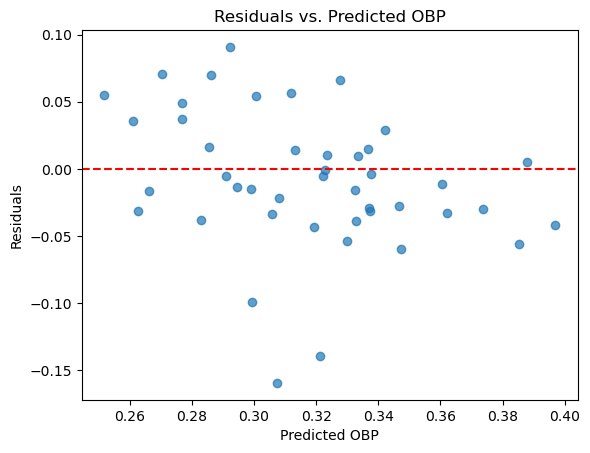

In [17]:



y_pred = model_final.predict(X_test_final)
mse = mean_squared_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


# Make predictions on the test set
y_pred_test = model_final.predict(X_test_final)

# Actual vs. Predicted Plot
plt.scatter(y_test_final, y_pred_test, alpha=0.7)
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--')
plt.xlabel('Actual OBP')
plt.ylabel('Predicted OBP')
plt.title('Actual vs. Predicted OBP')
plt.show()

# Residual Plot
residuals_test = y_test_final - y_pred_test
plt.scatter(y_pred_test, residuals_test, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted OBP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted OBP')
plt.show()


The top plot compares the actual OBP values to the predicted OBP values from the model. Points close to the diagonal red line represent accurate predictions, where the actual and predicted values are nearly identical. While many points cluster near this line, indicating reasonable accuracy for a subset of players, there are noticeable deviations where the model struggles to make accurate predictions. These deviations could result from factors not captured in the data, such as player-specific trends, situational performance, or injuries.

The bottom plot displays the residuals, calculated as the difference between actual and predicted OBP values, against the predicted OBP. Ideally, residuals should be randomly distributed around zero, reflecting an unbiased model. In this plot, the residuals are generally centered around zero, suggesting no major systematic bias in the model's predictions. However, a few points show large residuals, indicating the model struggled to predict OBP for certain players. Additionally, the lack of a clear pattern in the residuals suggests that the model's linear regression assumptions are largely satisfied. 

Overall, the model performs reasonably well but could benefit from further refinement and additional features to improve accuracy.

/var/folders/yz/btx95hws3k38_tyb73lg65_r0000gn/T/ipykernel_43179/790054654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned['predicted_OBP_21'] = model_final.predict(X_final)
/var/folders/yz/btx95hws3k38_tyb73lg65_r0000gn/T/ipykernel_43179/790054654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned['Error'] = df_final_cleaned['OBP_21'] - df_final_cleaned['predicted_OBP_21']


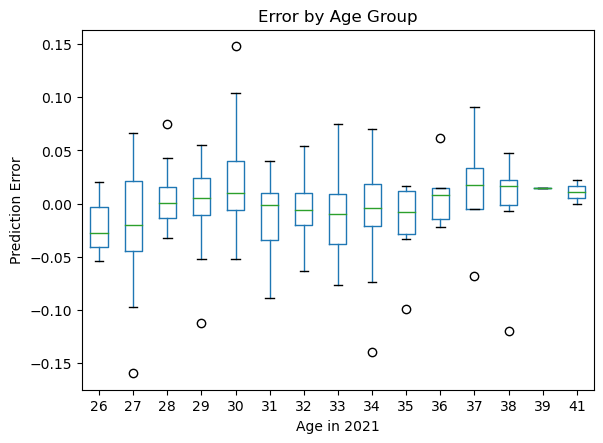

In [18]:
# Add predictions to the dataframe
df_final_cleaned['predicted_OBP_21'] = model_final.predict(X_final)

# Add error column to the dataframe for analysis
df_final_cleaned['Error'] = df_final_cleaned['OBP_21'] - df_final_cleaned['predicted_OBP_21']

# Boxplot of errors by age group
df_final_cleaned.boxplot(column='Error', by='age_21', grid=False)
plt.title('Error by Age Group')
plt.suptitle('')
plt.xlabel('Age in 2021')
plt.ylabel('Prediction Error')
plt.show()


The error analysis plot illustrates the distribution of prediction errors for on-base percentage (OBP) across different age groups in the 2021 season. 

For most age groups, the errors are centered around zero, indicating that the model's predictions are generally unbiased.

The presence of outliers in several age groups indicates instances where the model struggled to account for unusual player performances. This analysis suggests that while the model is broadly effective, incorporating additional features (such as player health or minor league performance trends) might improve predictions for younger players and reduce outliers.